Stratified sampling to ensure generalisation of dataset classes, as there could potentially be some datasets that are heavy LOS / NLOS. Performing this has now ensured that the dataset is evenly balanced for preprocessing

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from misc import save_to_pickle, load_from_pickle


# Load the dataset
df1 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part1.csv')
df2 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part2.csv')
df3 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part3.csv')
df4 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part4.csv')
df5 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part5.csv')
df6 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part6.csv')
df7 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part7.csv')

# Consolidating the datasets into a single DataFrame
df = pd.concat([df1, df2, df3, df4, df5, df6, df7])

full_training = []
full_testing = []

# Stratified sampling based on 'NLOS' column iterate through EACH df INDIVIDUALLY! (70/30 split)
for x in range (1,8):
    train, test = train_test_split(locals()[f'df{x}'], test_size=0.3, stratify=locals()[f'df{x}']['NLOS'], random_state=42)
    full_training.append(train)
    full_testing.append(test)


# Concatenate the training and testing DataFrames
df_training = pd.concat(full_training)
df_testing = pd.concat(full_testing)

# Combine everything back together
df_combined_original = pd.concat([df_training, df_testing])

# Display the combined DataFrame
df_combined_original.reset_index(drop=True, inplace=True)
df_combined_original

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,...,408.0,713.0,446.0,273.0,340.0,494.0,378.0,546.0,30.0,256.0
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,...,224.0,31.0,62.0,267.0,102.0,359.0,156.0,132.0,79.0,0.0
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,...,250.0,419.0,311.0,185.0,274.0,258.0,212.0,305.0,56.0,256.0
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,...,318.0,191.0,58.0,276.0,249.0,298.0,64.0,100.0,112.0,0.0
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,...,272.0,129.0,264.0,77.0,104.0,313.0,234.0,74.0,165.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,...,198.0,335.0,291.0,138.0,176.0,224.0,210.0,205.0,289.0,0.0
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,...,1176.0,341.0,314.0,445.0,332.0,1000.0,1337.0,304.0,922.0,256.0
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,...,219.0,246.0,71.0,374.0,183.0,16.0,160.0,266.0,269.0,256.0
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,...,171.0,182.0,177.0,74.0,278.0,204.0,150.0,181.0,145.0,0.0


Step 2. Check data for any missing or null values

In [29]:
# Check for missing values in each column across the whole dataset, if there are any missing values, return True
missing_values = df_combined_original.isnull().isna().any().any()
missing_values

False

Dataset

1) First 15 regineered to get First Path Power level and RX_Level then drop all columns that is used. 
Second half regineeredto the mean, variance

2) First 15 regineered to get First Path Power level and RX_Level then drop all columns that is used. 
Second half regineeredto the mean, variance
Then PCA entire

3)  First 15 regineered to get First Path Power level and RX_Level then drop all columns that is used. 
Second half is PCA to get a summary of the cir datas

4)  First 15 regineered to get First Path Power level and RX_Level then drop all columns that is used. 
Second half is PCA to get a summary of the cir datas
Then PCA Entire

5) From first 15, drop all unimportant features,
Second half is the regineeredto the mean, variance 

6) From first 15, drop all unimportant features,
Second half is the regineeredto the mean, variance 
Then pca the entire df

7)  From first 15, drop all unimportant features,
Second half is PCA to get a summary of the cir datas

8) From first 15, drop all unimportant features,
Second half is PCA to get a summary of the cir datas
Then pca the entire df

### Lets settle the first 15 features

In [30]:
# Get the first 15 datatset
no_cir_df_original = df_combined_original.iloc[:, :15]

no_cir_df_original

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,2.0,27.0,1024.0,110.0,64.0
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,2.0,27.0,1024.0,110.0,64.0
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,2.0,39.0,1024.0,110.0,64.0
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,2.0,39.0,1024.0,110.0,64.0
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,2.0,27.0,1024.0,110.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,2.0,39.0,1024.0,110.0,64.0
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,2.0,39.0,1024.0,110.0,64.0
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,2.0,27.0,1024.0,110.0,64.0
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,2.0,39.0,1024.0,110.0,64.0


Plot histogram to check for skewed data, if data is very similarly normally distributed it's not the best, as you can find greater differences in skewed data.

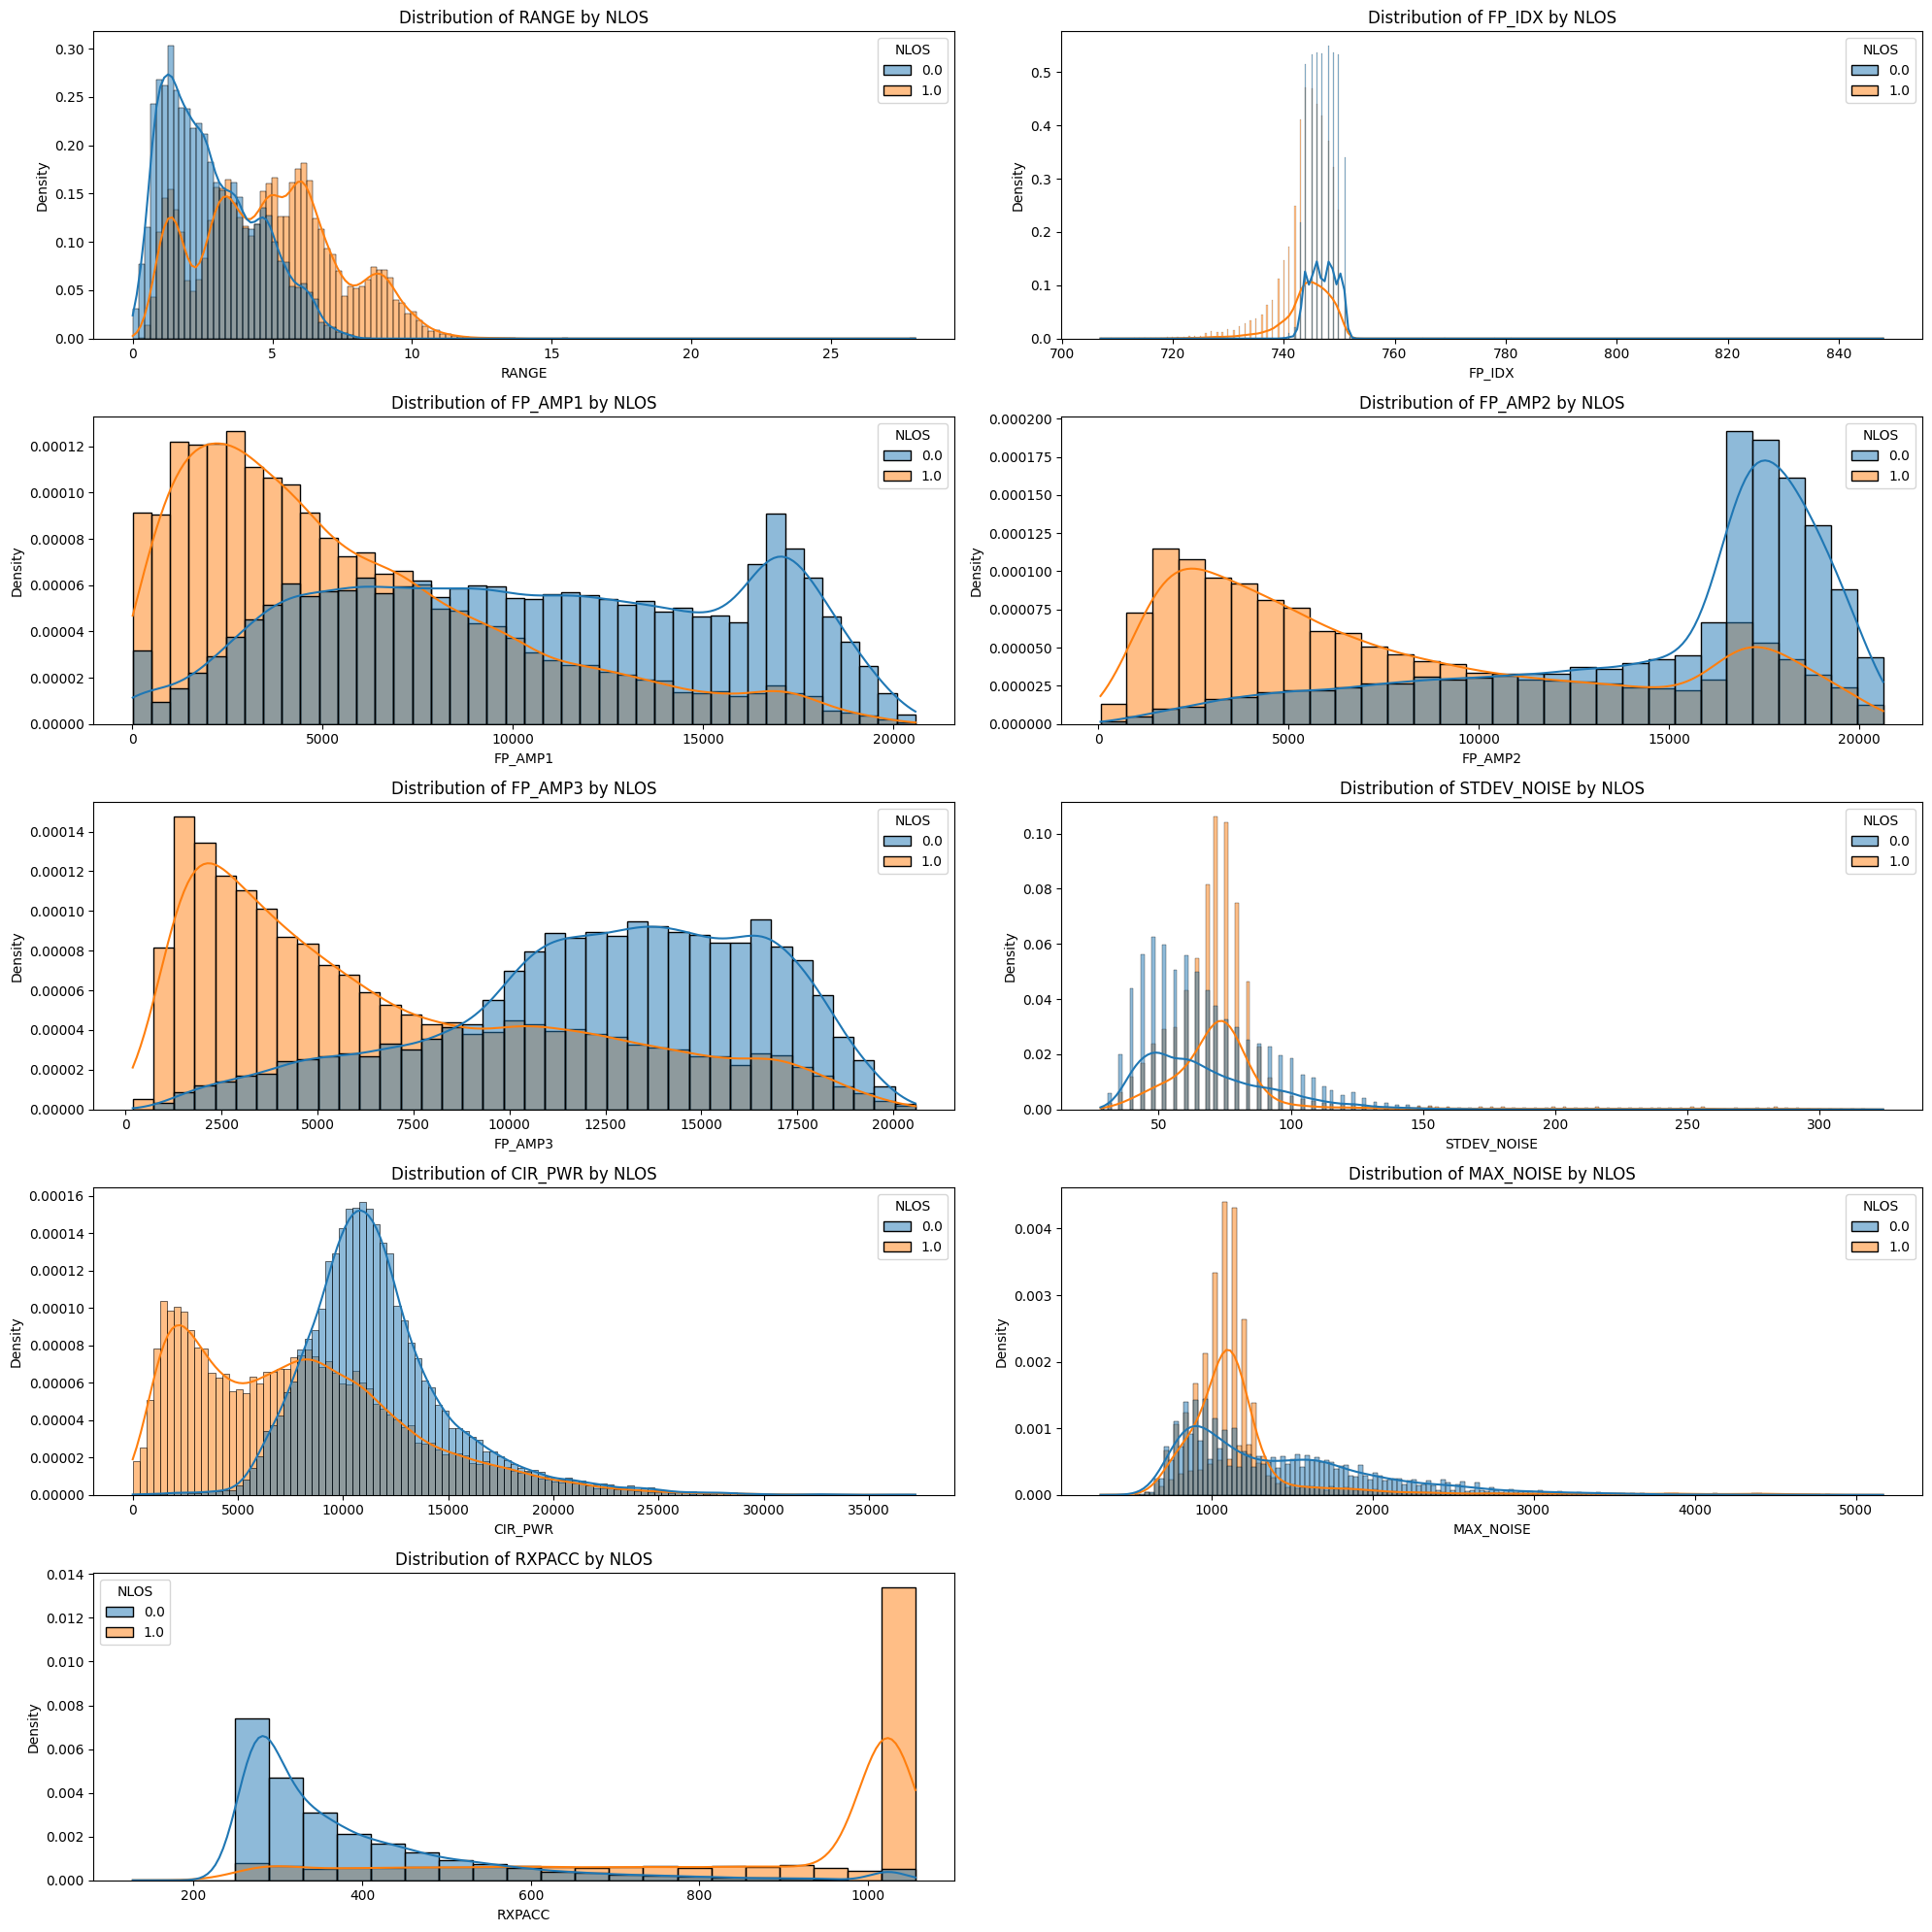

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with selected columns from df_combined
# The other few columns are close to a constant, and there will definetely be no relationship
features = ['RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 
            'STDEV_NOISE','CIR_PWR','MAX_NOISE','RXPACC']


# Plot numerical features with respect to the target variable
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features, start=1):
    plt.subplot(len(features)//2 + 1, 2, i)
    sns.histplot(data=no_cir_df_original, x=feature, hue='NLOS', kde=True, stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by NLOS')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

From the above, we can see that RANGE, FP_IDX, STDEV_NOISE, MAX_NOISE, RX_PACC have no clear distinct seperation between the classes, so there is no relationship that can be drawn out when using those features.

Correlation Matrix against features excluding the individual CIR data, drop those above 0.7 or under -0.7

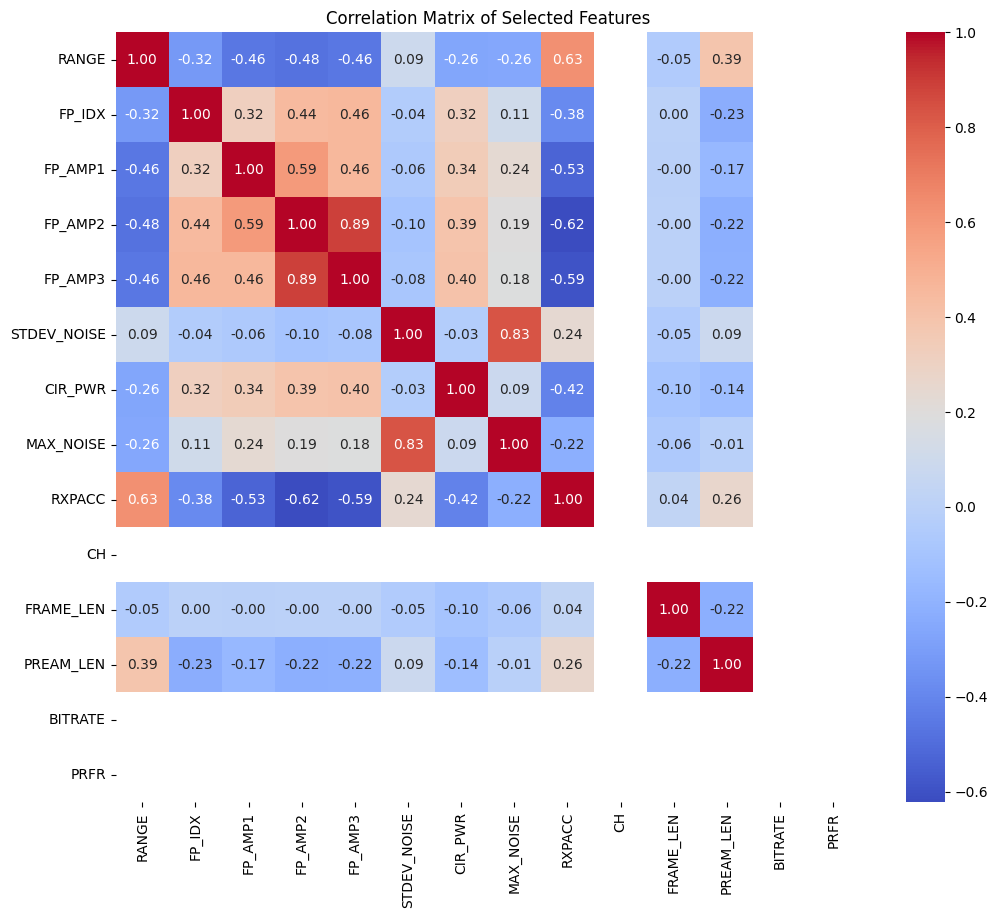

Pairs of features with high correlation coefficients:
FP_AMP2 - FP_AMP3: 0.89
STDEV_NOISE - MAX_NOISE: 0.83


In [32]:
corr_df = no_cir_df_original.drop(columns='NLOS')
correlation_matrix = corr_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Find pairs of features with high correlation coefficients
threshold = 0.8  # Set a threshold for high correlation
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("Pairs of features with high correlation coefficients:")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")
else:
    print("No pairs of features with high correlation coefficients found.")

Decision Tree to identify which feature is important

In [33]:
from sklearn.ensemble import RandomForestClassifier

X = no_cir_df_original.drop(columns='NLOS')
y = no_cir_df_original['NLOS']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame based on feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
feature_importance_df

,Feature,Importance
8,RXPACC,0.303088
6,CIR_PWR,0.145432
0,RANGE,0.143584
4,FP_AMP3,0.090162
7,MAX_NOISE,0.084958
3,FP_AMP2,0.079779
2,FP_AMP1,0.065870
5,STDEV_NOISE,0.050097
1,FP_IDX,0.030076
10,FRAME_LEN,0.005807


As seen from the df also, the CH, bitrate, PRFR, FRAME_LEN, PREAM_LEN are close to a common constant and thus also no feature importance of it. FP_IDX prove to be of low imporatance too.

#### We can now either drop all those unimportant or do feature engineering

In [34]:
# Drop
no_cir_df_dropped = no_cir_df_original.drop(['CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR'], axis=1)

no_cir_df_dropped

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0
...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0


We do the engineering base on the documentaion in DecanWave. This is to combine the FP_AMP thats shows high correlation

#### Estimating the signal power in the first path

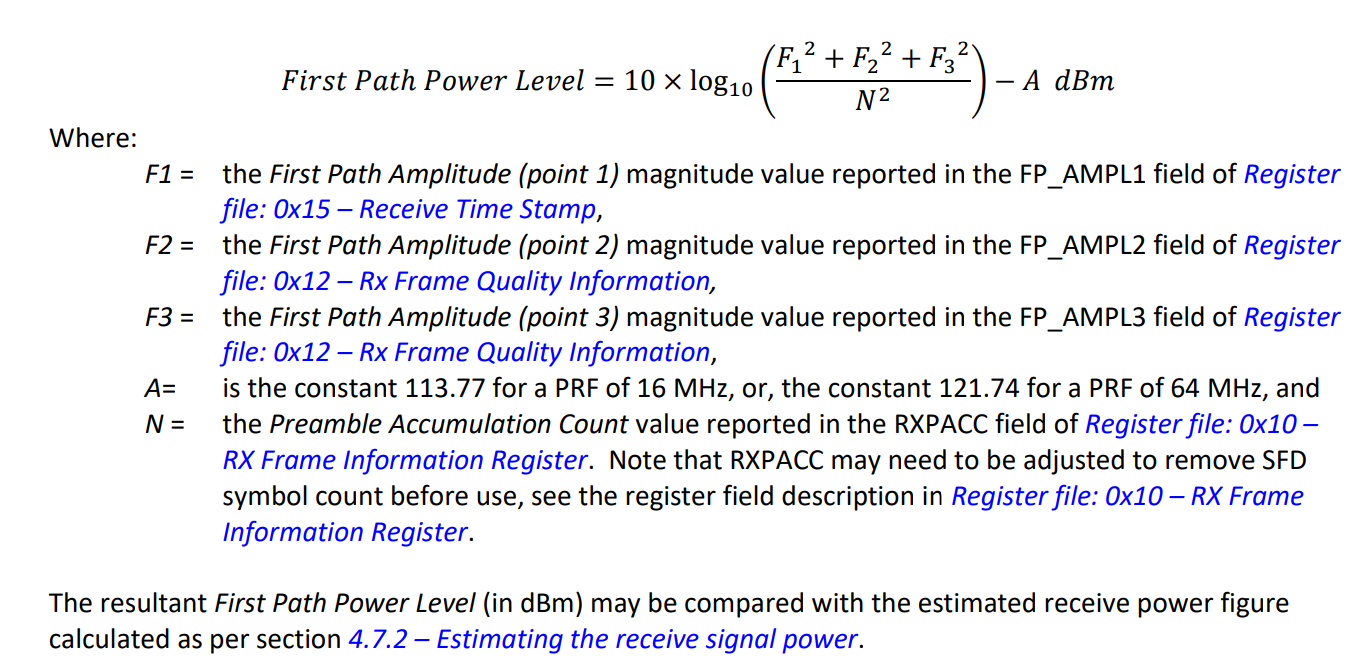

In [35]:
FP_AMP1_Squared = no_cir_df_original['FP_AMP1'] ** 2
FP_AMP2_Squared = no_cir_df_original['FP_AMP2'] ** 2
FP_AMP3_Squared = no_cir_df_original['FP_AMP3'] ** 2
N_VALUE_SQUARED = no_cir_df_original['RXPACC'] ** 2

FP_POWER_LEVEL = 10 * np.log10((FP_AMP1_Squared + FP_AMP2_Squared + FP_AMP3_Squared) / N_VALUE_SQUARED) - 121.74

# Concatenate FP_POWER_LEVEL with no_cir_df_original
no_cir_df_power = pd.concat([no_cir_df_original, FP_POWER_LEVEL.rename('FP_POWER_LEVEL')], axis=1)

# Display the new DataFrame
no_cir_df_power

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER_LEVEL
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,2.0,27.0,1024.0,110.0,64.0,-94.596003
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,2.0,27.0,1024.0,110.0,64.0,-82.200844
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,2.0,39.0,1024.0,110.0,64.0,-81.821606
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,2.0,39.0,1024.0,110.0,64.0,-82.833613
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,2.0,27.0,1024.0,110.0,64.0,-86.455578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-109.446217
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,2.0,39.0,1024.0,110.0,64.0,-103.265570
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,2.0,27.0,1024.0,110.0,64.0,-93.474549
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,2.0,39.0,1024.0,110.0,64.0,-114.306118


#### Estimating Recieve Signal Power

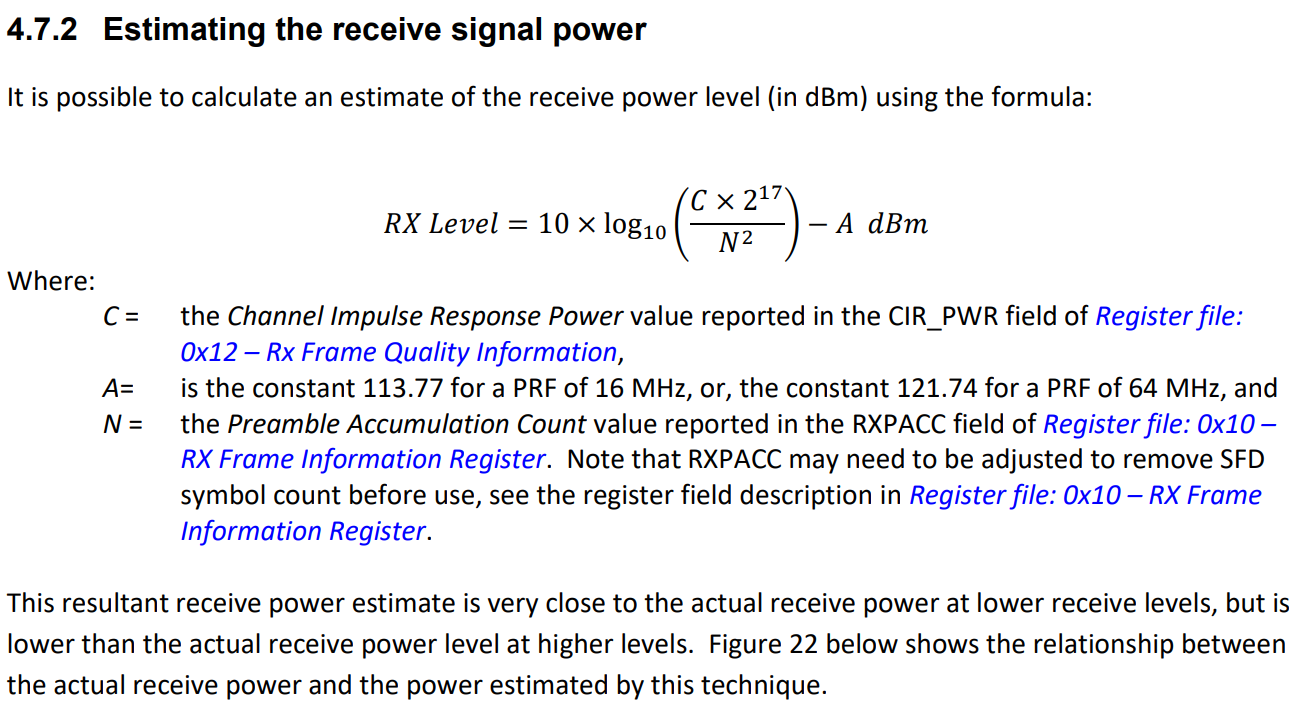

In [36]:
CIR_POWER = no_cir_df_original['CIR_PWR']
N_VALUE_SQUARED = no_cir_df_original['RXPACC'] ** 2

RX_LEVEL = 10 * np.log10((CIR_POWER * (2**17)) / N_VALUE_SQUARED) - 121.74

# Concatenate FP_POWER_LEVEL with no_cir_df_original
no_cir_df_rxsignal = pd.concat([no_cir_df_power, RX_LEVEL.rename('RX_LEVEL')], axis=1)

# Display the new DataFrame
no_cir_df_rxsignal

/home/skyish/CSC3105-Data_Anal/temp/CSC3105-DA-T2/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER_LEVEL,RX_LEVEL
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,2.0,27.0,1024.0,110.0,64.0,-94.596003,-83.242593
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,2.0,27.0,1024.0,110.0,64.0,-82.200844,-78.924940
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,2.0,39.0,1024.0,110.0,64.0,-81.821606,-78.433506
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,2.0,39.0,1024.0,110.0,64.0,-82.833613,-78.878945
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,2.0,27.0,1024.0,110.0,64.0,-86.455578,-82.764816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-109.446217,-94.681363
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,2.0,39.0,1024.0,110.0,64.0,-103.265570,-88.436032
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,2.0,27.0,1024.0,110.0,64.0,-93.474549,-81.707347
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,2.0,39.0,1024.0,110.0,64.0,-114.306118,-87.757599


##### Drop all that is used for transformation. And drop all those that has low importance.

In [37]:
no_cir_df_transform = no_cir_df_rxsignal.drop(['FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'RXPACC', 'CIR_PWR', 'CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR'], axis=1)

no_cir_df_transform

,NLOS,RANGE,FP_IDX,STDEV_NOISE,MAX_NOISE,FP_POWER_LEVEL,RX_LEVEL
0,0.0,4.88,744.0,108.0,1645.0,-94.596003,-83.242593
1,0.0,0.97,746.0,48.0,1189.0,-82.200844,-78.924940
2,0.0,1.07,745.0,116.0,3111.0,-81.821606,-78.433506
3,0.0,0.90,751.0,60.0,1414.0,-82.833613,-78.878945
4,0.0,2.79,744.0,44.0,743.0,-86.455578,-82.764816
...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,80.0,1188.0,-109.446217,-94.681363
41996,1.0,2.25,744.0,204.0,3126.0,-103.265570,-88.436032
41997,0.0,2.48,750.0,72.0,1068.0,-93.474549,-81.707347
41998,1.0,6.87,738.0,72.0,1071.0,-114.306118,-87.757599


First 15 feature we have made into two type of dataset.

no_cir_df_dropped = Only unimportant is removed.


no_cir_df_transform = feature transformation and unimportant is removed

### Lets settle all the CIR data next

In [38]:
# Get all the CIR Data
cir_df = df_combined_original.iloc[:, 15:]
cir_df

,CIR0,CIR1,CIR2,CIR3,CIR4,CIR5,CIR6,CIR7,CIR8,CIR9,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
0,733.0,363.0,497.0,618.0,387.0,703.0,536.0,321.0,298.0,156.0,...,408.0,713.0,446.0,273.0,340.0,494.0,378.0,546.0,30.0,256.0
1,71.0,206.0,182.0,277.0,252.0,336.0,259.0,305.0,120.0,185.0,...,224.0,31.0,62.0,267.0,102.0,359.0,156.0,132.0,79.0,0.0
2,348.0,293.0,334.0,336.0,246.0,186.0,475.0,197.0,447.0,103.0,...,250.0,419.0,311.0,185.0,274.0,258.0,212.0,305.0,56.0,256.0
3,151.0,177.0,496.0,193.0,200.0,298.0,117.0,251.0,308.0,308.0,...,318.0,191.0,58.0,276.0,249.0,298.0,64.0,100.0,112.0,0.0
4,127.0,81.0,340.0,134.0,297.0,269.0,291.0,201.0,207.0,189.0,...,272.0,129.0,264.0,77.0,104.0,313.0,234.0,74.0,165.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,173.0,60.0,216.0,348.0,384.0,182.0,96.0,252.0,271.0,100.0,...,198.0,335.0,291.0,138.0,176.0,224.0,210.0,205.0,289.0,0.0
41996,392.0,354.0,402.0,535.0,1146.0,283.0,972.0,562.0,117.0,466.0,...,1176.0,341.0,314.0,445.0,332.0,1000.0,1337.0,304.0,922.0,256.0
41997,309.0,295.0,242.0,301.0,187.0,144.0,118.0,171.0,291.0,80.0,...,219.0,246.0,71.0,374.0,183.0,16.0,160.0,266.0,269.0,256.0
41998,94.0,244.0,256.0,250.0,158.0,248.0,213.0,194.0,286.0,160.0,...,171.0,182.0,177.0,74.0,278.0,204.0,150.0,181.0,145.0,0.0


##### Lets try to aggregate the data method

In [39]:
# AGGREGATION
######################
# Peak Value
new_cir_df = pd.DataFrame({'CIR_PEAK_VALUE': cir_df.max(axis=1)})

# Energy Sum
new_cir_df['CIR_ENERGY_SUM'] = cir_df.sum(axis=1)

# Early Energy Sum: Calculate the sum of the first N CIR measurements
N = 100
early_cir_df = cir_df.iloc[:, :N]
new_cir_df['CIR_EARLY_ENERGY'] = early_cir_df.sum(axis=1)


In [40]:
# AGGREGATION
######################
# Mean Value
new_cir_df['CIR_MEAN'] = cir_df.mean(axis=1)    

# Variance
new_cir_df['CIR_VARIANCE'] = cir_df.var(axis=1)

# Skewness
new_cir_df['CIR_SKEWNESS'] = cir_df.skew(axis=1)

# Kurtosis
new_cir_df['CIR_KURTOSIS'] = cir_df.kurtosis(axis=1)

# Display the new features to verify

Observe the data variation of the aggragated data against NLOS

CIR PEAK VALUE AND EARLY ENERGY

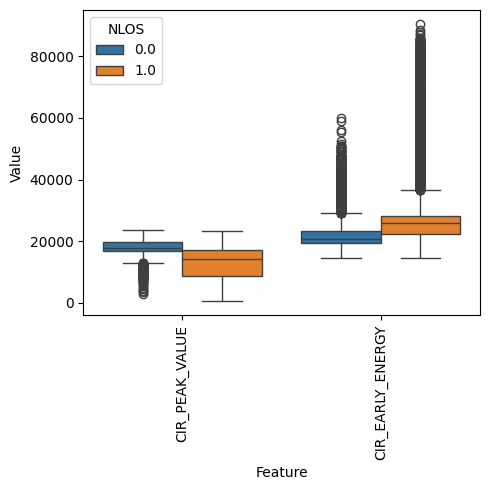

In [42]:
temp_df = pd.concat([df_combined_original.iloc[:, :1], new_cir_df], axis=1).copy()
selected = temp_df[['NLOS','CIR_PEAK_VALUE','CIR_EARLY_ENERGY']]

df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

CIR MEAN AND KURTOSIS

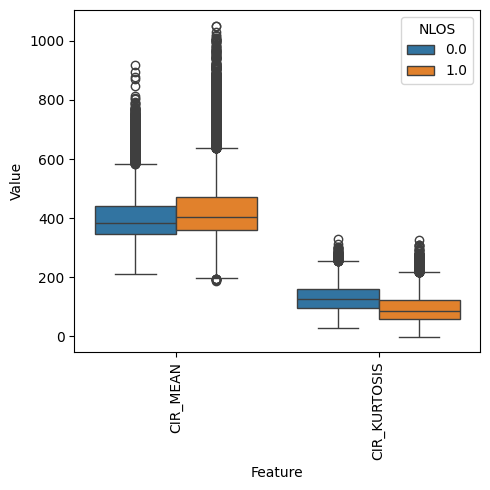

In [43]:
temp_df = pd.concat([df_combined_original.iloc[:, :1], new_cir_df], axis=1).copy()
selected = temp_df[['NLOS','CIR_MEAN','CIR_KURTOSIS']]

df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

CIR SKEWNESS

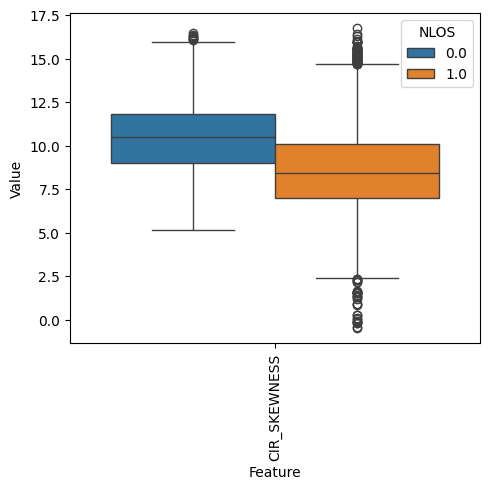

In [45]:
temp_df = pd.concat([df_combined_original.iloc[:, :1], new_cir_df], axis=1).copy()
selected = temp_df[['NLOS','CIR_SKEWNESS']]

df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

CIR VARIANCE

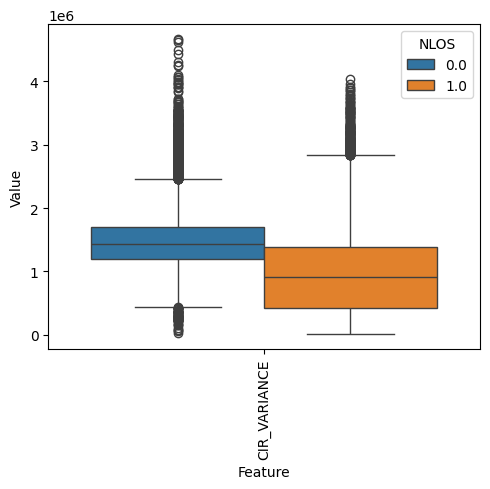

In [47]:
temp_df = pd.concat([df_combined_original.iloc[:, :1], new_cir_df], axis=1).copy()
selected = temp_df[['NLOS','CIR_VARIANCE']]

df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Results Analysis

There are a fk ton of outliers visualised.

## Alternative -> Feature Engineering of the CIR datas

We try to calculate the eigen energy for the CIR Data Columns. To see how many number of components best expalains close to 90% of the variance.

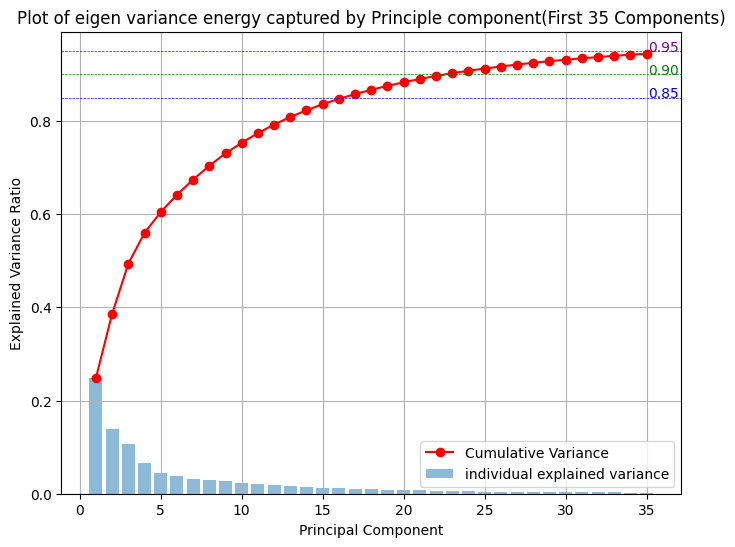

In [49]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Filter the dataset to only include the CIR columns and Class
temp_cir_df = cir_df

# Apply PCA
pca = PCA()
pca.fit(temp_cir_df)

# Calculate explained variance ratio (eigen energy)
eigen_energy = pca.explained_variance_ratio_[:35]  # Consider only the first 35 components
cumulative_variance = np.cumsum(eigen_energy)  # Cumulative explained variance

# Plot the explained variance ratio for the first 12 components
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigen_energy) + 1), eigen_energy, alpha=0.5, align='center', label=f'individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='red', marker='o', label='Cumulative Variance')

# Plot horizontal lines for specified thresholds
thresholds = [0.85, 0.90, 0.95]
threshold_colors = ['blue', 'green', 'purple']
for threshold, color in zip(thresholds, threshold_colors):
    plt.axhline(y=threshold, color=color, linestyle='--', linewidth=0.5)
    plt.text(len(cumulative_variance) + 0.1, threshold, f'{threshold:.2f}', color=color)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title(f"Plot of eigen variance energy captured by Principle component(First 35 Components)")
plt.legend()
plt.grid(True)
plt.show()

 _component = 25_ gives 90% accumulated variance. 

In [51]:
# Apply PCA
pca = PCA(n_components=25)
cir_df_pca = pca.fit_transform(temp_cir_df)

# Create a DataFrame for the PCA-transformed features
pca_columns = [f'PC{i+1}' for i in range(25)]  
cir_df_pca = pd.DataFrame(cir_df_pca, columns=pca_columns)

cir_df_pca


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,7738.528211,19942.478391,4995.891830,-1340.228360,5763.008746,-3144.209224,6389.924063,-3687.755594,5087.297966,3802.098587,...,-5199.007539,699.761604,-4447.444895,-1197.597832,3803.234437,1021.018431,4746.578392,1458.735394,5576.812440,-527.431948
1,-7105.812164,10568.625466,-7949.056888,4158.447485,-3805.101452,1000.517734,-7223.862234,6766.025465,-4499.035937,-24.917233,...,745.752309,2122.727495,-726.825248,-464.422047,575.339156,-579.003058,345.202601,791.800562,144.290944,-331.505178
2,-12837.142861,8936.989875,4676.919974,7060.525585,2887.657951,-4531.759761,1363.312330,-4549.186012,-1919.909335,-7746.036046,...,917.910095,3317.756805,-2353.378746,3579.338126,1349.676515,475.921428,1946.435227,381.724256,-245.421805,2378.184385
3,17336.589502,-6443.440083,-308.666705,10722.763781,-6521.404163,2265.453166,2731.494580,1692.825847,-449.570140,4312.726807,...,-1452.860463,-1543.271770,-1917.986563,-1789.051844,-3555.717058,1006.897084,1836.965380,-1316.061013,-992.605840,-393.235812
4,-13136.913863,1951.557797,9579.321344,5000.480894,2010.541097,-7727.430351,-4031.315786,-4214.132267,-772.536659,6470.303965,...,-1730.259207,2056.953609,-4280.995865,1716.707322,1569.467689,-1917.275608,-1910.226610,999.065773,1196.456165,-461.291029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1736.656748,-8200.260406,-203.542244,-2302.734986,-5198.356251,-6979.088044,-2930.187274,-70.564257,2108.451696,-5476.856999,...,-2807.167877,-472.860358,200.964864,-473.458513,494.563527,-772.167254,-551.886214,-49.157308,-2369.704262,-677.612679
41996,8294.841759,-5642.536276,7022.526294,1423.188010,-4281.104406,-6919.871794,4768.693946,5853.180025,1878.904558,4638.679327,...,-1076.584523,-2630.726266,-73.758086,-1246.233160,7457.360576,4744.744326,649.536015,3133.698768,-1884.060177,239.125004
41997,34568.551885,6148.992572,28179.155465,-4393.361149,3515.419802,5258.179957,989.195036,3789.373219,5475.092544,-4217.546844,...,4400.416242,2582.932669,6552.399719,4258.179153,8608.813072,1691.457174,-8136.361515,-7610.840362,2389.921689,-4667.763585
41998,-11577.605775,7747.588981,12904.772521,-936.841589,-7536.663378,7849.035625,-2466.790688,7894.818327,-5554.131852,-585.564904,...,242.603012,470.515152,659.355419,-2587.405526,-5481.462142,1594.926421,1952.237224,-2937.565935,1563.605315,-388.808219


#### Results Analysis

With PCA, we aim to visualise all the CIR data, summarised into this 25 PC components. This reduce the variance of data caused by aggregation.

#### For all CIR data we have made into two type of dataset.

new_cir_df = CIR data combined into Mean, Variance, Skewniess....



cir_df_pca = PCA of all the CIR data

### Lets combine all the data for training

1) First 15 regineered to get First Path Power level and Recieve Signal Level. Second half regineered to the mean, variance

In [71]:
from sklearn.preprocessing import RobustScaler

dataset_1 = pd.concat([no_cir_df_transform, new_cir_df], axis=1)
temp_df = dataset_1.drop(columns='NLOS').copy()

scaler = RobustScaler()
scaled_features = scaler.fit_transform(temp_df)

df_scaled = pd.DataFrame(scaled_features, columns=dataset_1.columns[1:])

df_scaled['NLOS'] = dataset_1['NLOS'].values

save_to_pickle("dataset_1", df_scaled)

df_scaled.head()

ValueError: Input X contains infinity or a value too large for dtype('float64').

2) First 15 regineered to get First Path Power level and Recieve Signal Level. Second half is the PCA of the CIR Data

In [65]:
dataset_2 = pd.concat([no_cir_df_transform, cir_df_pca], axis=1)
save_to_pickle("dataset_2", dataset_2)
dataset_2

,NLOS,RANGE,FP_IDX,STDEV_NOISE,MAX_NOISE,FP_POWER_LEVEL,RX_LEVEL,PC1,PC2,PC3,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,0.0,4.88,744.0,108.0,1645.0,-94.596003,-83.242593,7738.528211,19942.478391,4995.891830,...,-5199.007539,699.761604,-4447.444895,-1197.597832,3803.234437,1021.018431,4746.578392,1458.735394,5576.812440,-527.431948
1,0.0,0.97,746.0,48.0,1189.0,-82.200844,-78.924940,-7105.812164,10568.625466,-7949.056888,...,745.752309,2122.727495,-726.825248,-464.422047,575.339156,-579.003058,345.202601,791.800562,144.290944,-331.505178
2,0.0,1.07,745.0,116.0,3111.0,-81.821606,-78.433506,-12837.142861,8936.989875,4676.919974,...,917.910095,3317.756805,-2353.378746,3579.338126,1349.676515,475.921428,1946.435227,381.724256,-245.421805,2378.184385
3,0.0,0.90,751.0,60.0,1414.0,-82.833613,-78.878945,17336.589502,-6443.440083,-308.666705,...,-1452.860463,-1543.271770,-1917.986563,-1789.051844,-3555.717058,1006.897084,1836.965380,-1316.061013,-992.605840,-393.235812
4,0.0,2.79,744.0,44.0,743.0,-86.455578,-82.764816,-13136.913863,1951.557797,9579.321344,...,-1730.259207,2056.953609,-4280.995865,1716.707322,1569.467689,-1917.275608,-1910.226610,999.065773,1196.456165,-461.291029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,80.0,1188.0,-109.446217,-94.681363,1736.656748,-8200.260406,-203.542244,...,-2807.167877,-472.860358,200.964864,-473.458513,494.563527,-772.167254,-551.886214,-49.157308,-2369.704262,-677.612679
41996,1.0,2.25,744.0,204.0,3126.0,-103.265570,-88.436032,8294.841759,-5642.536276,7022.526294,...,-1076.584523,-2630.726266,-73.758086,-1246.233160,7457.360576,4744.744326,649.536015,3133.698768,-1884.060177,239.125004
41997,0.0,2.48,750.0,72.0,1068.0,-93.474549,-81.707347,34568.551885,6148.992572,28179.155465,...,4400.416242,2582.932669,6552.399719,4258.179153,8608.813072,1691.457174,-8136.361515,-7610.840362,2389.921689,-4667.763585
41998,1.0,6.87,738.0,72.0,1071.0,-114.306118,-87.757599,-11577.605775,7747.588981,12904.772521,...,242.603012,470.515152,659.355419,-2587.405526,-5481.462142,1594.926421,1952.237224,-2937.565935,1563.605315,-388.808219


3) First 15, drop all unimportant features. Second half regineered to the mean, variance

In [66]:
dataset_3 = pd.concat([no_cir_df_dropped, new_cir_df], axis=1)
save_to_pickle("dataset_3", dataset_3)
dataset_3

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CIR_PEAK_VALUE,CIR_ENERGY_SUM,CIR_EARLY_ENERGY,CIR_MEAN,CIR_VARIANCE,CIR_SKEWNESS,CIR_KURTOSIS
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,21328.0,690693.0,43361.0,679.815945,2.791582e+06,7.548897,66.833927
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,17025.0,350447.0,18857.0,344.928150,1.485065e+06,10.453308,119.222133
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,17838.0,442517.0,24651.0,435.548228,1.524761e+06,9.276358,99.495962
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,18138.0,362977.0,19265.0,357.260827,1.524792e+06,10.457185,120.581015
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,17817.0,366307.0,18168.0,360.538386,1.295946e+06,9.705158,109.001843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,11609.0,385449.0,25625.0,379.378937,5.612658e+05,9.793655,117.900486
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,17403.0,725497.0,54913.0,714.071850,9.891505e+05,9.107614,115.730667
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,19373.0,750502.0,20956.0,738.683071,4.666633e+06,5.556110,33.264859
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,22619.0,487767.0,21050.0,480.085630,1.540242e+06,10.109507,139.096338


 3) First 15, drop all unimportant features. Second half is the PCA of the CIR Data

In [67]:
dataset_4 = pd.concat([no_cir_df_dropped, cir_df_pca], axis=1)
save_to_pickle("dataset_4", dataset_4)
dataset_4

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,...,-5199.007539,699.761604,-4447.444895,-1197.597832,3803.234437,1021.018431,4746.578392,1458.735394,5576.812440,-527.431948
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,...,745.752309,2122.727495,-726.825248,-464.422047,575.339156,-579.003058,345.202601,791.800562,144.290944,-331.505178
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,...,917.910095,3317.756805,-2353.378746,3579.338126,1349.676515,475.921428,1946.435227,381.724256,-245.421805,2378.184385
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,...,-1452.860463,-1543.271770,-1917.986563,-1789.051844,-3555.717058,1006.897084,1836.965380,-1316.061013,-992.605840,-393.235812
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,...,-1730.259207,2056.953609,-4280.995865,1716.707322,1569.467689,-1917.275608,-1910.226610,999.065773,1196.456165,-461.291029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,...,-2807.167877,-472.860358,200.964864,-473.458513,494.563527,-772.167254,-551.886214,-49.157308,-2369.704262,-677.612679
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,...,-1076.584523,-2630.726266,-73.758086,-1246.233160,7457.360576,4744.744326,649.536015,3133.698768,-1884.060177,239.125004
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,...,4400.416242,2582.932669,6552.399719,4258.179153,8608.813072,1691.457174,-8136.361515,-7610.840362,2389.921689,-4667.763585
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,...,242.603012,470.515152,659.355419,-2587.405526,-5481.462142,1594.926421,1952.237224,-2937.565935,1563.605315,-388.808219
